In [1]:
import pandas as pd

# Load the dataset
bank_data = pd.read_csv('dataset/bank-additional-full.csv', header=0)

# Select only 'duration', 'age', and 'y' columns
selected_columns = ['duration', 'age', 'y']
data = bank_data[selected_columns]

# Verify the first few rows of the dataset
data.head()


,duration,age,y
0,261,56,no
1,149,57,no
2,226,37,no
3,151,40,no
4,307,56,no


In [2]:
# Select predictors and target variable
X = data[['duration', 'age']]
y = data['y']

# Convert target variable to binary numeric (yes: 1, no: 0)
y = y.apply(lambda x: 1 if x == 'yes' else 0)

# Verify the predictors and target variable
X.head(), y.head()


(   duration  age
 0       261   56
 1       149   57
 2       226   37
 3       151   40
 4       307   56,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: y, dtype: int64)

In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Display the shapes of the split datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (24712, 2), y_train shape: (24712,)
X_test shape: (16476, 2), y_test shape: (16476,)


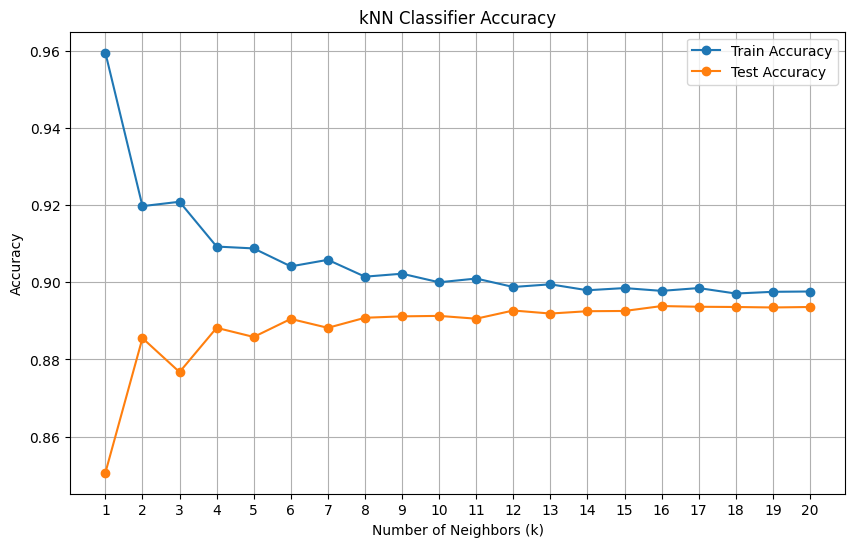

In [4]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []
k_values = range(1, 21)  # Test for k values from 1 to 20

# Iterate over different values of k
for k in k_values:
    # Build kNN model
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on training data
    y_train_pred = model.predict(X_train)
    
    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Predict on testing data
    y_test_pred = model.predict(X_test)
    
    # Calculate testing accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracies, marker='o', label='Test Accuracy')
plt.title('kNN Classifier Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()
